In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline 

trainDatamh = pd.read_csv("Data_Train.csv")
trainDatamh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 11 columns):
Unique_ID     78458 non-null int64
Name          78458 non-null object
Genre         78458 non-null object
Country       78458 non-null object
Song_Name     78457 non-null object
Timestamp     78458 non-null object
Views         78458 non-null int64
Comments      78458 non-null int64
Likes         78458 non-null object
Popularity    78458 non-null object
Followers     78458 non-null int64
dtypes: int64(4), object(7)
memory usage: 6.6+ MB


In [62]:
trainDatamh.head(5)

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [63]:
trainDatamh.Country.value_counts()

AU    78458
Name: Country, dtype: int64

In [64]:
trainDatamh.Genre.value_counts()

danceedm                22633
electronic              18331
all-music               10277
rbsoul                   5411
latin                    4562
trap                     4055
rock                     4000
deephouse                2423
pop                      1787
dubstep                  1100
ambient                   847
classical                 767
drumbass                  671
metal                     523
disco                     374
country                   336
alternativerock           156
hiphoprap                 100
reggaeton                  55
folksingersongwriter       39
indie                      11
Name: Genre, dtype: int64

In [82]:
# write a function to convert 'comma', 'k','K','m','M' values from Likes and Popularity column values
def convert(train_col):
    train_col = train_col.replace(',','')
    col_number = 0
    if 'K' in train_col:
        col_number = float(train_col.replace('K',''))*1000
    elif 'k' in train_col:
        col_number = float(train_col.replace('k',''))*1000
    elif 'm' in train_col:
        col_number = float(train_col.replace('m',''))*1000000
    elif 'M' in train_col:
        col_number = float(train_col.replace('M',''))*1000000
    else:
        col_number = int(train_col)
    return int(col_number)

In [83]:
#trainDatamh['Timestamp'] = trainDatamh['Timestamp'].apply(lambda x: (2019-x))
#trainDatamh['Timestamp'].head(5)
trainDatamh['Likes'] = trainDatamh['Likes'].apply(lambda x: convert(x))
trainDatamh['Popularity'] = trainDatamh['Popularity'].apply(lambda x: convert(x))

In [84]:
import datetime
def timefunc1(dat):
    today = datetime.datetime.now()
    today1 = today.strftime('%d-%m-%Y %H:%M:%S.%f')
    datetimeFormat = '%d-%m-%Y %H:%M:%S.%f'
    diff = datetime.datetime.strptime(today1, datetimeFormat) - datetime.datetime.strptime(dat, datetimeFormat)
    diff1 = diff.days
    return diff1

In [85]:
import datetime
def timefunc(dat):
    today = datetime.datetime.now()
    today1 = today.strftime('%Y-%m-%d %H:%M:%S.%f')
    datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'
    diff = datetime.datetime.strptime(today1, datetimeFormat) - datetime.datetime.strptime(dat, datetimeFormat)
    diff1 = diff.days
    return diff1

In [86]:
trainDatamh['Timestamp'] = trainDatamh['Timestamp'].apply(lambda x: timefunc(x))
trainDatamh['Timestamp'].head(5)

0     659
1    1308
2    1716
3     954
4    1218
Name: Timestamp, dtype: int64

In [87]:
trainDatamh.head(5)

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,659,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,1308,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,1716,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),954,113036,2,2400,76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),1218,110024,81,3031,699,201030


In [108]:
#Encode Genre into quantitative
le = preprocessing.LabelEncoder()
trainDatamh['Genre'] = le.fit_transform(trainDatamh['Genre'].astype('str'))

In [109]:
trainDatamh.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,399,16,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,659,14017,4,499,97,119563
1,249453,265,16,AU,Dj Aladdin - Old School Hip Hop Quick Mix,1308,1918,17,49,17,2141
2,681116,630,16,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,1716,9668,11,312,91,22248
3,387253,362,9,AU,MC Yago - Tenho Compromisso (DJ R7),954,113036,2,2400,76,393655
4,1428029,971,16,AU,Escape (feat. Steph Jones),1218,110024,81,3031,699,201030


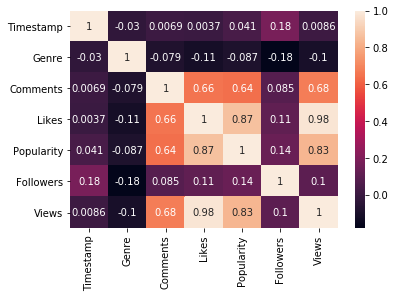

In [107]:
import seaborn as sns
attrib1 = ['Timestamp','Genre','Comments','Likes','Popularity','Followers','Views']
sns.heatmap(trainDatamh[attrib1].corr(),annot=True)

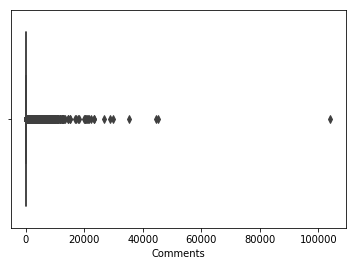

In [89]:
sns.boxplot(trainDatamh['Comments'])

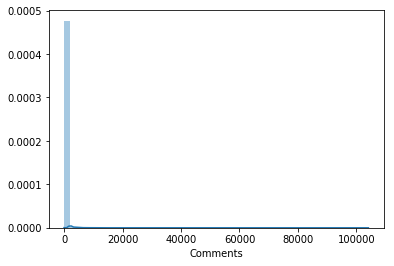

In [90]:
sns.distplot(trainDatamh['Comments'])

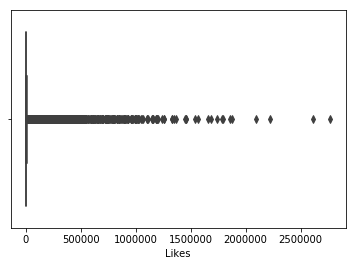

In [91]:
sns.boxplot(trainDatamh['Likes'])

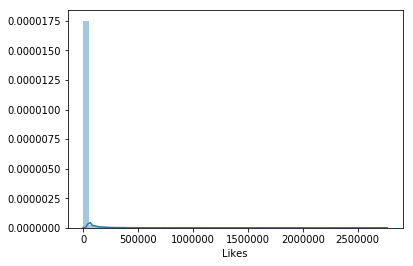

In [92]:
sns.distplot(trainDatamh['Likes'])

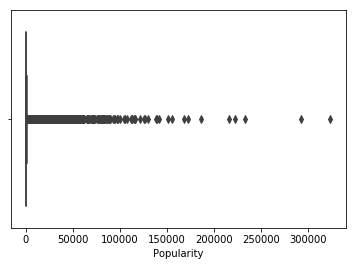

In [93]:
sns.boxplot(trainDatamh['Popularity'])

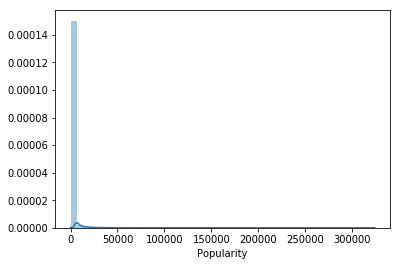

In [94]:
sns.distplot(trainDatamh['Popularity'])

In [100]:
trainDatamh.Genre.value_counts()

5     22633
10    18331
0     10277
17     5411
14     4562
20     4055
19     4000
6      2423
16     1787
9      1100
2       847
3       767
8       671
15      523
7       374
4       336
1       156
12      100
18       55
11       39
13       11
Name: Genre, dtype: int64

In [101]:
X_train = trainDatamh[['Genre','Timestamp','Comments','Likes','Popularity','Followers']]
Y_train = trainDatamh['Views']

In [102]:
X_train.head(5)

,Genre,Timestamp,Comments,Likes,Popularity,Followers
0,5,659,4,499,97,119563
1,5,1308,17,49,17,2141
2,5,1716,11,312,91,22248
3,17,954,2,2400,76,393655
4,5,1218,81,3031,699,201030


In [103]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
print(regression_model.intercept_)

-171021.2732449486


In [105]:
print(regression_model.coef_)

[ 4.84920208e+03  3.34137451e+01  3.97067564e+02  7.45535723e+01
 -7.50211016e+01 -6.12582806e-03]


In [106]:
regression_model.score(X = X_train, y = Y_train)

0.9649803082028757